In [1]:
import numpy as np
import math
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_lsq_spline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


rho = 4.5
A = 2

def epsilon(L, W): 
    return 1 - W/(rho*A*L)

def kay(dP, Q, L, t): 
    eta = 1.797  #https://mterm-pro.com/viscosity/ at 20 degree Celsius
    return (eta*L*Q) / (dP*A*t)

def Sw(epsilon, k): 
    return 14/rho * (epsilon**3 / (k*(1-epsilon)**2))**0.5
    # return epsilon**3 / (k*(1-epsilon)**2)

def dm(Sw): 
    return 6/(rho*Sw)

def init_df():
    df = pd.DataFrame(columns=['dP', 'Q', 'A', 'L', 'W', 'epsilon', 't', 'k', 'Sw', 'dm'], index=range(0,9))
    df['dP'][0:3] = 15
    df['dP'][3:6] = 30
    df['dP'][6:9] = 60
    df['Q'][0:3] = [5,10,20]
    df['Q'][3:6] = [5,10,20]
    df['Q'][6:9] = [5,10,20]
    return df

def compute_df(df, L, W, t): 
    df['A'] = A
    df['L'] = L
    df['W'] = W
    df['epsilon'] = epsilon(df['L'].values, df['W'].values)
    df['t'] = t
    df['k'] = kay(df['dP'].values, df['Q'].values, df['L'].values, t)
    df['Sw'] = Sw(df['epsilon'].values, df['k'].values, )
    df['dm'] = dm(df['Sw'])
    return df

def display_df(df): 
    return df['dP'].values

def division(X, division_number=50): 
    return np.linspace(np.min(X),np.max(X), division_number)

def spline(X, Y, k=3, division_number=50): 
    model = make_interp_spline(X,Y,k=k)
    # model = UnivariateSpline(X, Y, k=k)
    # model = make_lsq_spline(X, Y, t=np.arange(len(X)), k=k)
    # X_spline = np.linspace(X[0], X[-1], division_number)
    X_spline = division(X)
    Y_spline = model(X_spline)
    return X_spline, Y_spline

def polyreg(X, Y, degree, test_value): 
    X = X.reshape(-1,1)
    Y = Y.reshape(-1,1)
    test_value = test_value.reshape(-1,1)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,Y)
    return model.predict(test_value)

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import display

df_list = []
W = np.array([1.2157, 1.135, 1.0584, 0.9716, 1.4858])
t = np.array([[286, 555, 119, 78, 154, 309, 37, 71, 143],
              [115, 227, 459, 53, 160, 376, 25, 76, 179], 
              [ 29,  87,  203, 13, 40,  94,  6, 19,  45],
              [ 10,  20,   41,  5, 10,  20,  2,  4,   9],
              [  7,  15,   28,  3,  6,  13,  1,  3,   6]])


for i in range(5): 
    if i < 4:
        df = init_df()
        df = compute_df(df, 0.3, W[i], t[i])
    
    if i == 4: 
        df = init_df()
        df = compute_df(df, 0.5, W[i], t[i])
    
    df_list.append(df)
    

for df in df_list:
    display(df)

,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,0.3,1.2157,0.549741,286,0.000314,158.89628,0.008391
1,15,10,2,0.3,1.2157,0.549741,555,0.000324,156.517249,0.008519
2,15,20,2,0.3,1.2157,0.549741,119,0.00302,51.247679,0.026017
3,30,5,2,0.3,1.2157,0.549741,78,0.000576,117.35268,0.011362
4,30,10,2,0.3,1.2157,0.549741,154,0.000583,116.597993,0.011435
5,30,20,2,0.3,1.2157,0.549741,309,0.000582,116.787122,0.011417
6,60,5,2,0.3,1.2157,0.549741,37,0.000607,114.304038,0.011665
7,60,10,2,0.3,1.2157,0.549741,71,0.000633,111.963093,0.011909
8,60,20,2,0.3,1.2157,0.549741,143,0.000628,112.356637,0.011867


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,0.3,1.135,0.57963,115,0.000781,116.842051,0.011411
1,15,10,2,0.3,1.135,0.57963,227,0.000792,116.077536,0.011487
2,15,20,2,0.3,1.135,0.57963,459,0.000783,116.714979,0.011424
3,30,5,2,0.3,1.135,0.57963,53,0.000848,112.176835,0.011886
4,30,10,2,0.3,1.135,0.57963,160,0.000562,137.819364,0.009674
5,30,20,2,0.3,1.135,0.57963,376,0.000478,149.392631,0.008925
6,60,5,2,0.3,1.135,0.57963,25,0.000898,108.955774,0.012237
7,60,10,2,0.3,1.135,0.57963,76,0.000591,134.3297,0.009926
8,60,20,2,0.3,1.135,0.57963,179,0.000502,145.772891,0.009147


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,0.3,1.0584,0.608,29,0.003098,67.596589,0.019725
1,15,10,2,0.3,1.0584,0.608,87,0.002066,82.788576,0.016105
2,15,20,2,0.3,1.0584,0.608,203,0.00177,89.421882,0.014911
3,30,5,2,0.3,1.0584,0.608,13,0.003456,64.004787,0.020832
4,30,10,2,0.3,1.0584,0.608,40,0.002246,79.388168,0.016795
5,30,20,2,0.3,1.0584,0.608,94,0.001912,86.054723,0.015494
6,60,5,2,0.3,1.0584,0.608,6,0.003744,61.49381,0.021682
7,60,10,2,0.3,1.0584,0.608,19,0.002364,77.378014,0.017231
8,60,20,2,0.3,1.0584,0.608,45,0.001997,84.203868,0.015835


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,0.3,0.9716,0.640148,10,0.008985,46.714691,0.028542
1,15,10,2,0.3,0.9716,0.640148,20,0.008985,46.714691,0.028542
2,15,20,2,0.3,0.9716,0.640148,41,0.008766,47.29502,0.028192
3,30,5,2,0.3,0.9716,0.640148,5,0.008985,46.714691,0.028542
4,30,10,2,0.3,0.9716,0.640148,10,0.008985,46.714691,0.028542
5,30,20,2,0.3,0.9716,0.640148,20,0.008985,46.714691,0.028542
6,60,5,2,0.3,0.9716,0.640148,2,0.011231,41.78289,0.031911
7,60,10,2,0.3,0.9716,0.640148,4,0.011231,41.78289,0.031911
8,60,20,2,0.3,0.9716,0.640148,9,0.009983,44.317447,0.030086


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,0.5,1.4858,0.669822,7,0.021393,35.31609,0.037754
1,15,10,2,0.5,1.4858,0.669822,15,0.019967,36.555626,0.036474
2,15,20,2,0.5,1.4858,0.669822,28,0.021393,35.31609,0.037754
3,30,5,2,0.5,1.4858,0.669822,3,0.024958,32.696346,0.040779
4,30,10,2,0.5,1.4858,0.669822,6,0.024958,32.696346,0.040779
5,30,20,2,0.5,1.4858,0.669822,13,0.023038,34.031436,0.039179
6,60,5,2,0.5,1.4858,0.669822,1,0.037437,26.696455,0.049944
7,60,10,2,0.5,1.4858,0.669822,3,0.024958,32.696346,0.040779
8,60,20,2,0.5,1.4858,0.669822,6,0.024958,32.696346,0.040779


[array([0.54974073, 0.5796296 , 0.60799998, 0.64014816, 0.66982222]),
 [array([ 51.24767685, 116.78712463, 112.35663605]),
  array([116.71498108, 149.3926239 , 145.77288818]),
  array([89.42188263, 86.05472565, 84.20386505]),
  array([47.29502106, 46.71469116, 44.31744766]),
  array([35.31608963, 34.03143692, 32.69634628])],
 [array([114.304039  , 111.96308899, 112.35663605]),
  array([108.9557724 , 134.32969666, 145.77288818]),
  array([61.49380875, 77.37801361, 84.20386505]),
  array([41.78289032, 41.78289032, 44.31744766]),
  array([26.696455  , 32.69634628, 32.69634628])]]

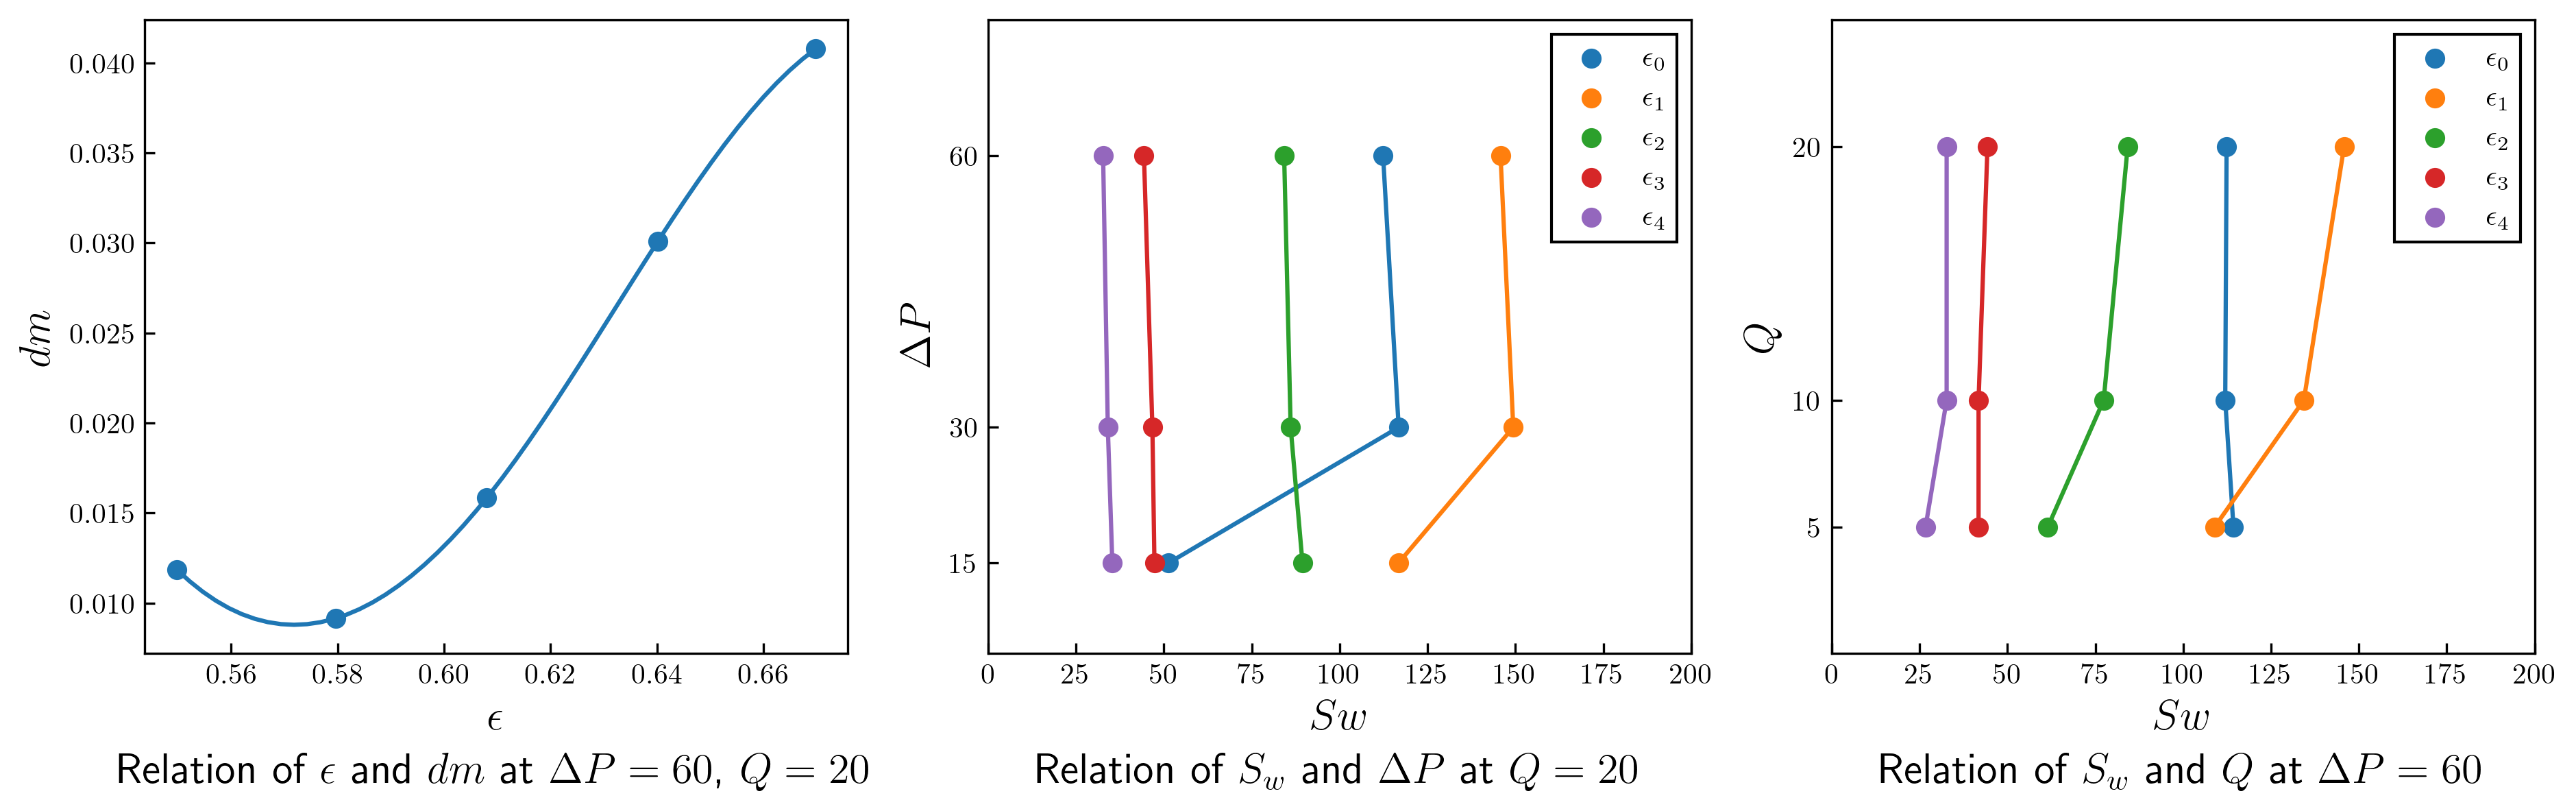

In [93]:
X = [np.array([]), [], []]
Y = [np.array([]), [], []]
for i in range(3):
    for df in df_list:
        x = np.array([])
        y = np.array([])
        if i == 0:
            X[i] = np.append(X[i], df[(df['dP']==60) & (df['Q']==20)]['epsilon'].values.astype(np.float32))
            Y[i] = np.append(Y[i], df[(df['dP']==60) & (df['Q']==20)]['dm'].values.astype(np.float32))

        if i == 1:
            X[i].append(np.append(x, df[df['Q']==20]['Sw'].values.astype(np.float32)))
            Y[i].append(np.append(y, df[df['Q']==20]['dP'].values.astype(np.float32)))
            
        if i == 2:
            X[i].append(np.append(x, df[df['dP']==60]['Sw'].values.astype(np.float32)))
            Y[i].append(np.append(y, df[df['dP']==60]['Q'].values.astype(np.float32)))

    
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = "cmr"
plt.rcParams['font.sans-serif'] = "cmss"
plt.rcParams['font.monospace'] = "cmtt"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['text.usetex'] = True
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titley'] = -0.23
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.fancybox'] = False
plt.rcParams["legend.framealpha"] = 1 
plt.rcParams["legend.edgecolor"] = 'black'
labels = [r"$\epsilon_0$", 
          r"$\epsilon_1$", r"$\epsilon_2$", 
          r"$\epsilon_3$", r"$\epsilon_4$"]
titles = ["Relation of $\epsilon$ and $dm$ at $\Delta P=60$, $Q=20$",
          "Relation of $S_w$ and $\Delta P$ at $Q=20$",
          "Relation of $S_w$ and $Q$ at $\Delta P=60$"]

fig, ax = plt.subplots(1,3, figsize=(15,4))


for i in range(3):
    if i == 0:
        xs, ys = spline(X[i], Y[i])
        ax[i].scatter(X[i], Y[i])
        ax[i].plot(xs, ys)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("$\epsilon$")
        ax[i].set_ylabel("$dm$")
    if i > 0:
        for j in range(5): 
            ax[i].scatter(X[i][j], Y[i][j], label=labels[j])
            ax[i].plot(X[i][j], Y[i][j])
            ax[i].set_xlim(0,200)
            ax[i].set_xlabel("$Sw$")
            ax[i].set_title(titles[i])
            ax[i].legend()

ax[1].set_ylim(5,75)
ax[1].set_yticks([15,30,60])
ax[1].set_ylabel("$\Delta P$")
ax[2].set_ylim(0,25)
ax[2].set_yticks([5,10,20])
ax[2].set_ylabel("$Q$")


plt.savefig("graph.png", bbox_inches="tight")
plt.savefig("graph.pdf", bbox_inches="tight")

X